# Regresión lineal simple



Sean $\{(x_i,y_i) \}_{i=1}^{n}$

Queremos minimizar la siguiente función:
$$S(\beta_0,\beta_1)=\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_i)^2$$

El estimador para el intercepto es:
$$\hat{\beta}_0 = \bar{y}-\hat{\beta}_{1}\bar{x}.$$

El estimador para la pendiente es:
$$\hat{\beta}_{1}=\frac{s_{xy}}{s_{xx}}.$$


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

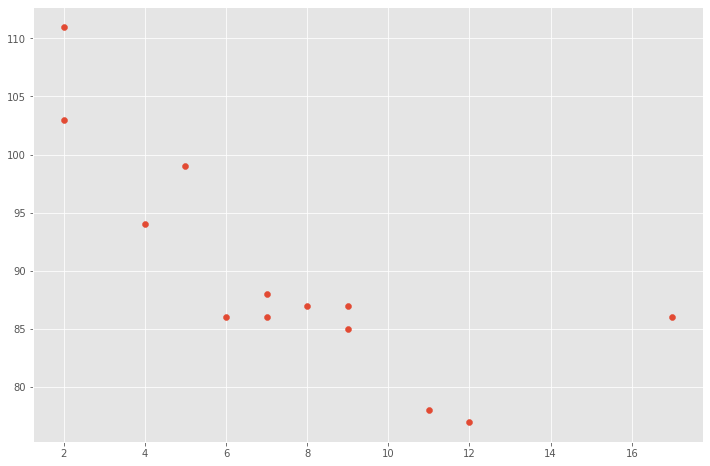

In [2]:

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

In [3]:
import numpy as np

barx = np.mean(x) # La media de los datos de x
bary = np.mean(y) # La media de los datos de y

print(barx, bary) 

7.615384615384615 89.76923076923077


In [4]:
varx = np.var(x, ddof=1) #varianza muestral
covxy= np.cov(x,y, ddof=1) #covarianza muestral

varx, covxy 

(17.423076923076923, array([[ 17.42307692, -30.51282051],
        [-30.51282051,  92.85897436]]))

In [5]:
print(varx)

17.423076923076923


In [6]:
covxy=covxy[0,1]
covxy

-30.51282051282051

In [7]:
beta1 = covxy/varx 
beta0 = bary-beta1*barx

print(beta0, beta1)

103.10596026490066 -1.751287711552612


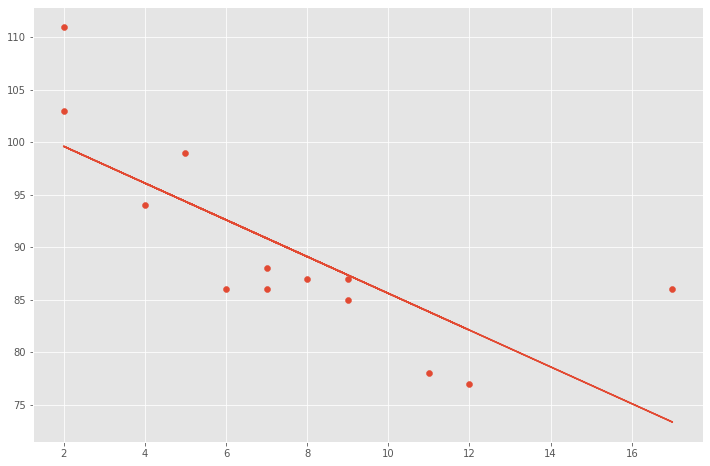

In [8]:
import matplotlib.pyplot as plt
from scipy import stats


slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [9]:
slope, intercept 

(-1.7512877115526118, 103.10596026490066)

In [10]:
r #es una medida (coeficiente de determinación) que indica qué tan buen modelo es el ajustado

-0.758591524376155

In [11]:
s = myfunc(10) # predicción en el valor 10

print(s)

85.59308314937454


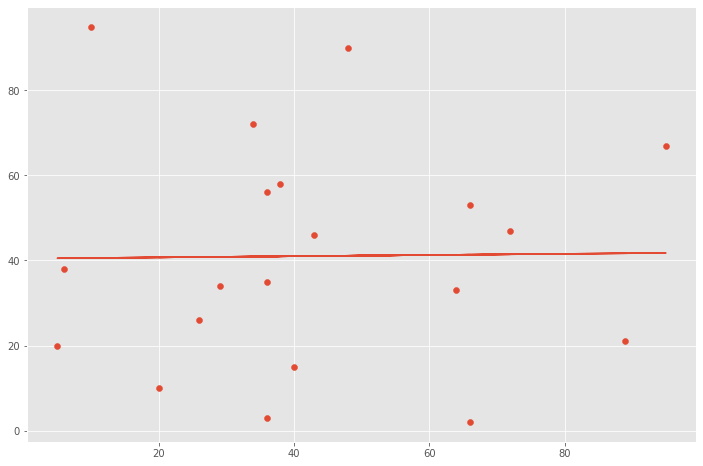

In [12]:
import matplotlib.pyplot as plt
from scipy import stats

x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [13]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.01331814154297491


## Regresión polinomial

In [14]:
X = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

In [15]:
transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X)

PolynomialFeatures(include_bias=False)

In [16]:
X_ = transformer.transform(X)
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
model = LinearRegression().fit(X_, y)

In [19]:
r_sq = model.score(X_, y)
print(f"coeficiente de determinación: {r_sq}")


print(f"intercepto: {model.intercept_}")

print(f"coeficientes: {model.coef_}")

coeficiente de determinación: 0.8908516262498563
intercepto: 21.37232142857144
coeficientes: [-1.32357143  0.02839286]


In [20]:
y_pred = model.predict(X_)
print(f"respuesta predictiva:\n{y_pred}")

respuesta predictiva:
[15.46428571  7.90714286  6.02857143  9.82857143 19.30714286 34.46428571]
